실습예제1

In [ ]:
#기초적인 인공신경망
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

x=np.array([0,1,2,3,4]) #입력값
y=x*2+1 #출력값
print(x)
print(y)
model=Sequential() #신경망 객체
# input_shape=(1,) 입력데이터의 형태(독립변수의 갯수)-1차원
model.add(Dense(1,input_shape=(1,))) #출력노드 1개
#모형 컴파일, SGD 확률적 경사 하강법, mse 손실함수 평균제곱오차
model.compile('SGD','mse')
#학습, verbose=1 학습과정이 자세히 출력되는 옵션 
model.fit(x[:2],y[:2],epochs=500,verbose=1) #학습횟수 500

In [ ]:
print('실제값:',y[:2])
# flatten() 2차원 데이터를 1차원 데이터로 변형시키는 함수
print('예측값:',model.predict(x[2:]).flatten())

실습예제2 - 손글씨 이미지 분류(mnist)

In [ ]:
#로지스틱 회귀분석
#케라스에 내장된 숫자 손글씨 데이터셋
from keras.datasets import mnist
#데이터를 다운로드한 후 학습용, 검증용으로 구분
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
print(X_train.shape)

In [ ]:
#기계학습을 위하여 3차원 데이터를 2차원 형태로 변환시킴
X_train=X_train.reshape(60000,784).astype('float32')/255.0
X_test=X_test.reshape(10000,784).astype('float32')/255.0

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000) #로지스틱 회귀분석 모형
#학습(시간이 오래걸리므로 이미지 100장만으로 학습)
model.fit(X_train,y_train)

In [ ]:
#모형의 예측 정확도 평가
print(model.score(X_train[:100],y_train[:100]))
print(model.score(X_test[:100],y_test[:100]))

In [ ]:
#모형 저장
import pickle
pickle.dump(model, open('d:/data/mnist/mnist_logit.model','wb'))

In [ ]:
#모형 로딩
model=pickle.load(open('d:/data/mnist/mnist_logit.model','rb'))
#검증용 데이터를 입력하여 실제값과 예측값 비교
pred=model.predict(X_test[:10])
print('예측값:',pred[:])
print('실제값:',y_test[:10])

In [ ]:
#혼동행렬 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test) #예측값

cm=confusion_matrix(y_test, pred) #혼동행렬
#데이터프레임으로 변환
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

In [ ]:
#의사결정 나무
from keras.datasets import mnist
#데이터를 다운로드한 후 학습용, 검증용으로 구분
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
#기계학습을 위하여 3차원 데이터를 2차원 형태로 변환시킴
X_train=X_train.reshape(60000,784).astype('float32')/255.0
X_test=X_test.reshape(10000,784).astype('float32')/255.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() #로지스틱 회귀분석 모형
#학습(시간이 오래걸리므로 이미지 100장만으로 학습)
model.fit(X_train,y_train)

In [ ]:
print(model.score(X_train[:100],y_train[:100]))
print(model.score(X_test[:100],y_test[:100]))

In [ ]:
#모형 저장
import pickle
pickle.dump(model, open('d:/data/mnist/mnist_tree.model','wb'))

In [ ]:
#모형 로딩
model=pickle.load(open('d:/data/mnist/mnist_tree.model','rb'))
#검증용 데이터를 입력하여 실제값과 예측값 비교
pred=model.predict(X_test[:10])
print('예측값:',pred[:])
print('실제값:',y_test[:10])

In [ ]:
#혼동행렬 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test) #예측값

cm=confusion_matrix(y_test, pred) #혼동행렬
#데이터프레임으로 변환
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

In [ ]:
#랜덤포레스트 모형, 트리갯수 100개
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=10)
forest.fit(X_train,y_train)

In [ ]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

사례기반추론

In [ ]:
#손글씨 이미지 데이터셋 다운로드 및 학습용/검증용 구분
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
#학습용 이미지 6만장,3차원 데이터를 2차원 데이터로 변환
X_train=X_train.reshape(60000,784).astype('float32')/255.0
#검증용 이미지 1만장
X_test=X_test.reshape(10000,784).astype('float32')/255.0

In [ ]:
#최적의 k를 도출하기 위한 코드
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
train_rate=[]
test_rate=[]
neighbors=range(1,11)
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n) #n_neighbors 이웃의 수
    knn.fit(X_train[:100],y_train[:100]) #이미지 100장만 학습
    #정확도를 저장
    train_rate.append(knn.score(X_train[:100],y_train[:100]))
    test_rate.append(knn.score(X_test[:100],y_test[:100]))
    
plt.rcParams['font.size']=15 #그래프의 폰트 사이즈
plt.plot(neighbors,train_rate,label='Train') #학습용 정확도
plt.plot(neighbors,test_rate,label='Test') #검증용 정확도
plt.ylabel('Accuracy') #y축의 라벨
plt.xlabel('k') #x축의 라벨
plt.legend() #범례 표시

max_rate=max(test_rate) #최대값
idx=np.argmax(test_rate) #최대값이 몇번째 인덱스에 있는지 계산
print('최적의 k:',idx+1)
print('최적의 정확도:',max_rate)

In [ ]:
#k-1 모형
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train[:1000],y_train[:1000])

In [ ]:
#모형평가
print(model.score(X_train[:1000],y_train[:1000]))
print(model.score(X_test[:1000],y_test[:1000]))

In [ ]:
#모형 저장
import pickle
pickle.dump(model,open('d:/data/mnist/mnist_knn.model','wb'))

In [ ]:
#모형 불러오기
model=pickle.load(open('d:/data/mnist/mnist_knn.model','rb'))
pred=model.predict(X_test[:10])
print('예측값:',pred)
print('실제값:',y_test[:10])

In [ ]:
#혼동행렬 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=range(10),columns=range(10))
df_cm

인공신경망(sklearn)

In [ ]:
#손글씨 이미지 데이터셋 다운로드 및 학습용/검증용 구분
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
#학습용 이미지 6만장,3차원 데이터를 2차원 데이터로 변환
X_train=X_train.reshape(60000,784).astype('float32')/255.0
#검증용 이미지 1만장
X_test=X_test.reshape(10000,784).astype('float32')/255.0

In [ ]:
#range(strat,stop,step)
for i in range(100,301,100):
    print(i)


In [ ]:
#최적의 은닉노드 갯수를 구하는 실험
from sklearn.neural_network import MLPClassifier
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100):
    for j in range(100,301,100):
        model=MLPClassifier(random_state=100,
                           hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train[:1000],y_train[:1000])
        train_rate.append(model.score(X_train[:1000],y_train[:1000]))
        test_rate.append(model.score(X_test[:1000],y_test[:1000]))
        
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

max_rate=max(test_rate)#최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 위치
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt==idx:
            print(i,j) #값을 출력ㄱ하고
            break
        cnt+=1 #카운트 증가 처리

In [ ]:
#실험을 통해 얻은 최적의 노드 갯수를 적용한 인공신경망 모형
model=MLPClassifier(hidden_layer_sizes=[300,100],random_state=100)
model.fit(X_train[:1000],y_train[:1000])

In [ ]:
print(model.score(X_train[:1000],y_train[:1000]))
print(model.score(X_test[:1000],y_test[:1000]))

SVM

In [ ]:
#손글씨 이미지 데이터셋 다운로드 및 학습용/검증용 구분
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
#학습용 이미지 6만장,3차원 데이터를 2차원 데이터로 변환
x_train=x_train.reshape(60000,784).astype('float32')/255.0
#검증용 이미지 1만장
x_test=x_test.reshape(10000,784).astype('float32')/255.0

In [ ]:
#최적의 cost,gamma를 도출하는 실험
%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
train_rate=[]
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000]
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        model=SVC(C=n,gamma=g, random_state=10)
        model.fit(X_train[:100],y_train[:100])
        train_rate.append(
        [n,g,model.score(X_train[:100],y_train[:100])])
        test_rate.append(
        [n,g,model.score(X_test[:100],y_test[:100])])
        
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
idx=np.where(test_arr[:,2]==max_rate)[0][0]
print('최적의 c:',test_rate[idx])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:', test_rate[idx][2])
plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print('최적의 c:',test_rate[idx][0])

In [ ]:
#최적의 파라미터를 적용한 SVM 모형
model=SVC(C=10, gamma=0.01, random_state=10)
model.fit(X_train[:1000],y_train[:1000])

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

인공신경망(keras)

In [ ]:
#손글씨 이미지 데이터셋 다운로드 및 학습용/검증용 구분
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
#학습용 이미지 6만장,3차원 데이터를 2차원 데이터로 변환
x_train=x_train.reshape(60000,784).astype('float32')/255.0
#검증용 이미지 1만장
x_test=x_test.reshape(10000,784).astype('float32')/255.0

In [ ]:
y_train[:5]

In [ ]:
#출력데이터의 원핫인코딩
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
y_train[:5]

In [ ]:
#validation 데이터
x_val=x_train[:12600]
x_train=x_train[12600:]
y_val=y_train[:12600]
y_train=y_train[12600:]

In [ ]:
print(x_train.shape) #Train
print(x_val.shape) #Validation
print(x_test.shape) #Test

In [ ]:
#신경망 모형
from keras.models import Sequential
from keras.layers import Dense
model=Sequential() #인공신경망 모형 객체
#units 출력노드 갯수, input_dim 입력값의 차원, activation 활성화 함수
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
#출력노드수는 10개,softmax 함수(0일 확률, 1일 확률,,,)
model.add(Dense(units=10, activation='softmax'))
#모형 컴파일, 손실함수와 최적화함수, 측정항목 지정
model.compile(loss='categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])

In [ ]:
model.summary() #모형 요약

In [ ]:
#학습, epochs 실험횟수, batch_size 학습할 이미지의 갯수
#validation_data 인공신경망을 튜닝하고 파라미터를 최적화하기 위한 데이터
hist=model.fit(x_train,y_train,epochs=5,batch_size=32,
              validation_data=(x_val,y_val))

In [ ]:
import numpy as np
from numpy import argmax
#모형평가
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=32,verbose=1)
print('loss_and_metrics:' + str(loss_and_metrics))
#랜덤으로 이미지 5장 선택
xhat_idx=np.random.choice(x_test.shape[0],50)
xhat=x_test[xhat_idx]
#예측값
yhat=model.predict_classes(xhat)
print(yhat)
print(y_test[i])
print(argmax(y_test[xhat_idx[i]]))
for i in range(50):
    print('True:'+str(argmax(y_test[xhat_idx[i]]))+
         ', Predict:' + str(yhat[i]))
#모형을 파일로 저장
model.save('d:/data/mnist/mnist_keras.model')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,loss_ax=plt.subplots() #서브플롯
#서로 다른 y축을 가진 데이터를 동일한 플롯에 그래프 출력
acc_ax=loss_ax.twinx()
#Train 데이터셋의 손실률
loss_ax.plot(hist.history['loss'],'y',label='train loss')
#Validation 데이터셋의 손실률
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
#Train 데이터셋의 정확도
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
#Validation 데이터셋의 정확도
acc_ax.plot(hist.history['val_accuracy'],'g',label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
from keras.models import load_model
#평가용 이미지 50장을 랜덤으로 선택
xhat_idx=np.random.choice(x_test.shape[0],50)
xhat=x_test[xhat_idx]

#미리 저장된 모형 불러오기
model=load_model('d:/data/mnist/mnist_keras.model')

#숫자예측
yhat=model.predict_classes(xhat)
for i in range(50):
    print('True:' + str(argmax(y_test[xhat_idx[i]]))
         +',Predict:' +str(yhat[i]))

실습예제 3 - 당뇨병 데이터셋

In [ ]:
import pandas as pd
df=pd.read_csv('d:/data/pima/data.csv')
df.head()

In [ ]:
df.columns=["pregnancies","glucose","blood_pressure","skin_thickness","insulin",
           "bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

In [ ]:
df.groupby('outcome').mean() #샘플링 전의 카운트

In [ ]:
df["outcome"].value_counts()

In [ ]:
train_cols=df.columns[0:8]

In [ ]:
X=df[train_cols]
y=df["outcome"]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_sample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['outcome'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [ ]:
df_samp["outcome"].value_counts()

In [ ]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [ ]:
#인공신경망
from keras.models import Sequential
from keras.layers.core import Dense
model=Sequential() #신경망 모형 객체
#input_shape => input layer의 노드갯수=독립변수 갯수
#Dense(출력노드갯수, activation='활성화함수')
model.add(Dense(128,input_shape=(8,),activation='relu'))
model.add(Dense(64, activation='relu')) #첫번째 은닉층
model.add(Dense(32, activation='relu')) #두번째 은닉층
#output layer, 노드수 1개, 활성화함수 sigmoid 0.0~1.0 (미분류)
model.add(Dense(1, activation='sigmoid'))
#모형 컴파일, 손실함수와 최적화함수, 측정할 항목 지정
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary() #모형 요약

In [ ]:
X_train.boxplot()

In [ ]:
min_on_tr=X_train.min(axis=0)
range_on_tr=(X_train-min_on_tr).max(axis=0)
X_train_scaled=(X_train - min_on_tr)/ range_on_tr
X_test_scaled=(X_test - min_on_tr) / range_on_tr

In [ ]:
X_train_scaled.boxplot()

In [ ]:
X_train.shape

In [ ]:
#학습과정, validation_split validation 데이터의 비율
from keras.callbacks import EarlyStopping
import numpy as np

#학습을 조기에 종료시키는 함수, 2회이상 개선이 되지 않으면 종료
early_stopping=EarlyStopping(patience=2) 
hist=model.fit(X_train_scaled,y_train,epochs=50,
               validation_split=0.2,callbacks=[early_stopping])
# hist=model.fit(X_train_scaled,y_train,epochs=50,
#                validation_split=0.2)

In [ ]:
#손실률과 정확도 그래프
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [ ]:
#모형의 정확도 평가
scores=model.evaluate(X_train_scaled,y_train,verbose=1)
print(scores)
scores=model.evaluate(X_test_scaled,y_test,verbose=1)
print(scores)

실습예제4-붓꽃데이터

In [1]:
import seaborn as sns
#seaborn 퍄카자애 내장된 iris 데이터셋 로딩
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, 0:4].values #독립변수
y=iris.iloc[:,4].values #종속변수
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, 0:4].values #독립변수
y=iris.iloc[:,4].values #종속변수
#출력노드를 3개로 만들기 위한 원핫인코딩
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
y2=pd.get_dummies(y1).values
y2

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [4]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y2,test_size=0.2,
                                               stratify=y,random_state=10)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense
#인공신경망 모형
model=Sequential()
#입력층 input_shape 입력노드의 차원, activation 활성화 함수
model.add(Dense(64,input_shape=(4,),activation='relu'))
#첫번째 은닉층
model.add(Dense(32,activation='relu'))
#출력층, 출력노드수 3, 활성화함수 softmax
model.add(Dense(3,activation='softmax'))
#모형 컴파일
model.compile(loss='categorical_crossentropy',optimizer='Adam',
             metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [6]:
#학습,학습진행정보가 히스토리가 객체에 저장됨
hist=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 0s 1ms/step - loss: 1.2125 - accuracy: 0.3750 - val_loss: 1.3982 - val_accuracy: 0.1667
Epoch 2/100
96/96 [==============================] - 0s 62us/step - loss: 1.1030 - accuracy: 0.3750 - val_loss: 1.2378 - val_accuracy: 0.1667
Epoch 3/100
96/96 [==============================] - 0s 62us/step - loss: 0.9987 - accuracy: 0.3750 - val_loss: 1.1046 - val_accuracy: 0.2083
Epoch 4/100
96/96 [==============================] - 0s 52us/step - loss: 0.9411 - accuracy: 0.4688 - val_loss: 0.9948 - val_accuracy: 0.2917
Epoch 5/100
96/96 [==============================] - 0s 73us/step - loss: 0.8956 - accuracy: 0.5104 - val_loss: 0.9074 - val_accuracy: 0.5000
Epoch 6/100
96/96 [==============================] - 0s 73us/step - loss: 0.8593 - accuracy: 0.6979 - val_loss: 0.8381 - val_accuracy: 0.9167
Epoch 7/100
96/96 [==============================] - 0s 62us/step - loss: 0.8264 - accuracy: 0.7708 - val

96/96 [==============================] - 0s 52us/step - loss: 0.1844 - accuracy: 0.9688 - val_loss: 0.1603 - val_accuracy: 0.9583
Epoch 59/100
96/96 [==============================] - 0s 52us/step - loss: 0.1809 - accuracy: 0.9688 - val_loss: 0.1579 - val_accuracy: 0.9583
Epoch 60/100
96/96 [==============================] - 0s 73us/step - loss: 0.1785 - accuracy: 0.9792 - val_loss: 0.1423 - val_accuracy: 1.0000
Epoch 61/100
96/96 [==============================] - 0s 62us/step - loss: 0.1746 - accuracy: 0.9792 - val_loss: 0.1474 - val_accuracy: 0.9583
Epoch 62/100
96/96 [==============================] - 0s 52us/step - loss: 0.1711 - accuracy: 0.9688 - val_loss: 0.1532 - val_accuracy: 0.9583
Epoch 63/100
96/96 [==============================] - 0s 52us/step - loss: 0.1670 - accuracy: 0.9688 - val_loss: 0.1425 - val_accuracy: 0.9583
Epoch 64/100
96/96 [==============================] - 0s 62us/step - loss: 0.1644 - accuracy: 0.9792 - val_loss: 0.1343 - val_accuracy: 0.9583
Epoch 65/100

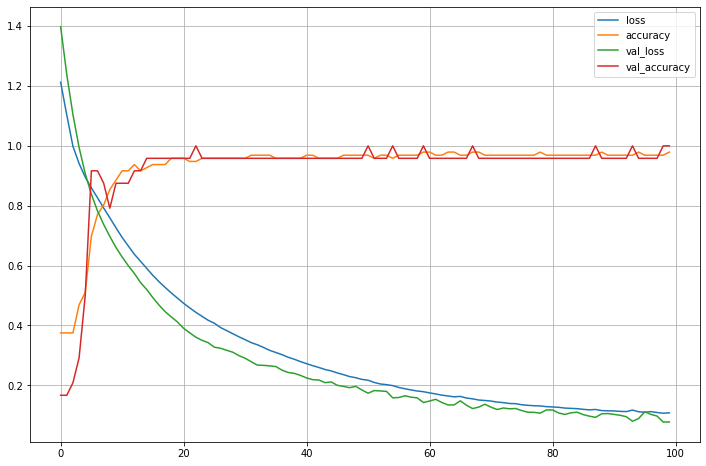

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실율
plt.plot(hist.history['accuracy']) #정확도
plt.plot(hist.history['val_loss']) #손실율
plt.plot(hist.history['val_accuracy']) #정확도
plt.legend(['loss','accuracy','val_loss','val_accuracy']) #범례
plt.grid() #그리드 표시
plt.show() #그래프 출력

In [8]:
#모형평가
loss,accuracy=model.evaluate(X_test,y_test)
print(loss,accuracy) #손실률과 정확도

30/30 [==============================] - 0s 0us/step
0.10087775439023972 0.9666666388511658


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
#모형의 예측값
pred=model.predict(X_test)
print(pred[:5])
#실제값
y_test_class=np.argmax(y_test,axis=1) #최대값의 인덱스
print(y_test_class[:5])
#예측값
pred_class=np.argmax(pred,axis=1)
#혼동행렬
print(confusion_matrix(y_test_class,pred_class))

[[2.7452917e-03 7.8403234e-01 2.1322237e-01]
 [9.8225349e-01 1.7741444e-02 5.0832505e-06]
 [1.5663406e-03 4.4317383e-01 5.5525982e-01]
 [5.0628383e-04 3.5815436e-01 6.4133930e-01]
 [2.4515035e-02 9.5994544e-01 1.5539530e-02]]
[1 0 1 2 1]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [10]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
#새로운 값 예측
test_set=np.array([[5,2.9,1,0.2]])
print(model.predict_classes(test_set))
print(iris['species'].unique()[model.predict_classes(test_set)])

[0]
['setosa']


In [12]:


test_set=np.array([[7,3.0,5,1.4]])
print(iris['species'].unique()[model.predict_classes(test_set)])

['versicolor']


In [13]:
#학습이 완료된 인공신경망 모형을 파일로 저장
model.save('d:/data/iris/iris_keras.model')
#학습에 사용된 가중치값들을 파일로 저장
model.save_weights('d:/data/iris/iris_keras.weights')

실습예제5-타이타닉 데이터셋

In [14]:
import pandas as pd
df=pd.read_csv('d:/data/titanic/train3.csv')
df.head()

,Survived,Pclass,Pclass1,Pclass2,Pclass3,Sex,male,female,Age,SibSp,Parch,Fare
0,0,3,0,0,1,male,1,0,22.0,1,0,7.2500
1,1,1,1,0,0,female,0,1,38.0,1,0,71.2833
2,1,3,0,0,1,female,0,1,26.0,0,0,7.9250
3,1,1,1,0,0,female,0,1,35.0,1,0,53.1000
4,0,3,0,0,1,male,1,0,35.0,0,0,8.0500


<function matplotlib.pyplot.show(*args, **kw)>

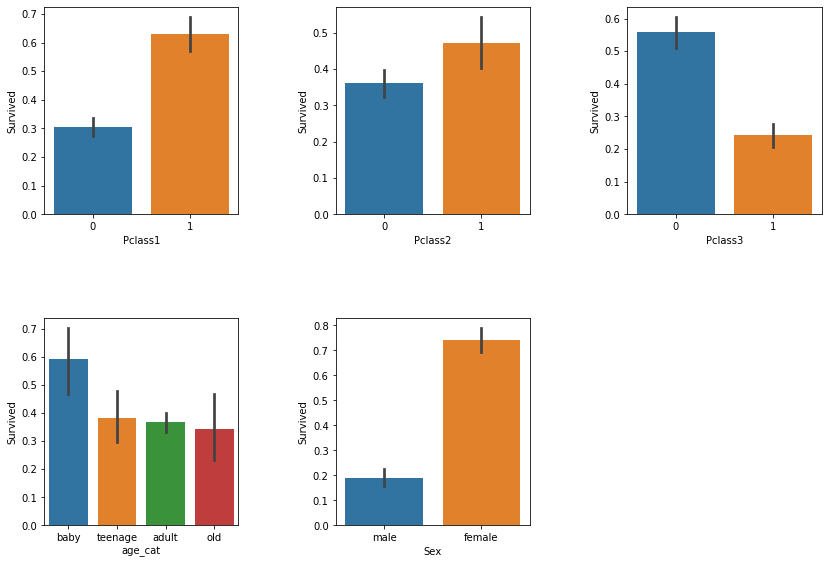

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#연령대 구간을 나눔, bins 구간
df['age_cat']=pd.cut(df['Age'],bins=[0,10,20,50,100],
                    include_lowest=True,labels=['baby','teenage','adult',
                                               'old'])
plt.figure(figsize=[12,8])
plt.subplot(231) #2행 3열 중 1번 그래프
sns.barplot('Pclass1','Survived',data=df)
plt.subplot(232) #2행 3열 중 2번 그래프
sns.barplot('Pclass2','Survived',data=df)
plt.subplot(233)
sns.barplot('Pclass3','Survived',data=df)
plt.subplot(234)
sns.barplot('age_cat','Survived',data=df)
plt.subplot(235)
sns.barplot('Sex','Survived',data=df)
plt.subplots_adjust(top=1,bottom=0.1,left=0.1,right=1,
                   hspace=0.5,wspace=0.5)
plt.show

AxesSubplot(0.125,0.125;0.775x0.755)


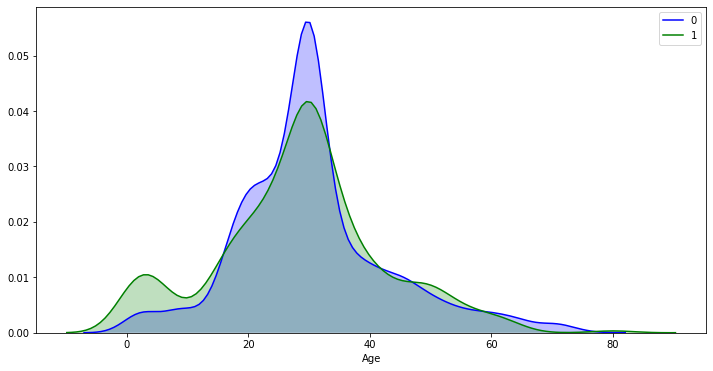

In [16]:
#연령대별 분포 곡선
f,ax=plt.subplots(figsize=(12,6))
#커널 밀도 그래프
g=sns.kdeplot(df['Age'][(df['Survived']==0)],
             ax=ax, color='Blue',shade=True)
print(ax)
g=sns.kdeplot(df['Age'][(df['Survived']==1)],
             ax=ax, color='Green',shade=True)
g.set_xlabel('Age')
g=g.legend(['0','1'])

In [17]:
df['Survived'].value_counts() #사망/생존자 카운트

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Pclass1', 'Pclass2', 'Pclass3', 'Sex', 'male',
       'female', 'Age', 'SibSp', 'Parch', 'Fare', 'age_cat'],
      dtype='object')

In [19]:
train_cols=(['Pclass1','Pclass2','Pclass3',
            'male','female','Age','SibSp','Parch','Fare'])

In [20]:
X=df[train_cols] #독립변수
y=df['Survived'] #종속변수

In [21]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Survived'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [22]:
df_samp['Survived'].value_counts() #사망/생존자 카운트

1    342
0    342
Name: Survived, dtype: int64

In [23]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                test_size=0.2, random_state=10)

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense
model=Sequential() #신경망 모형
#input layer, input_shape  독립변수의 갯수, 출력노드 갯수 128
model.add(Dense(128,input_shape=(len(X_train.columns),),activation='relu'))
#hidden layer 1
model.add(Dense(64,activation='relu'))
#hidden layer 2
model.add(Dense(32,activation='relu'))
#output layer, 출력노드수 1개, sigmoid 0.0~1.0
#model.add(dense(2,activation='softmax')) ->원핫인코딩 해야함
model.add(Dense(1,activation='sigmoid'))
#컴파일
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
#요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


In [25]:
#학습
hist=model.fit(X_train,y_train,epochs=500, validation_split=0.2)

Train on 569 samples, validate on 143 samples
Epoch 1/500
569/569 [==============================] - 0s 684us/step - loss: 0.2223 - accuracy: 0.6924 - val_loss: 0.2103 - val_accuracy: 0.6923
Epoch 2/500
569/569 [==============================] - 0s 37us/step - loss: 0.2044 - accuracy: 0.7012 - val_loss: 0.1965 - val_accuracy: 0.7133
Epoch 3/500
569/569 [==============================] - 0s 40us/step - loss: 0.1946 - accuracy: 0.7135 - val_loss: 0.1968 - val_accuracy: 0.7273
Epoch 4/500
569/569 [==============================] - 0s 39us/step - loss: 0.1902 - accuracy: 0.7223 - val_loss: 0.1966 - val_accuracy: 0.7622
Epoch 5/500
569/569 [==============================] - 0s 37us/step - loss: 0.1840 - accuracy: 0.7540 - val_loss: 0.1773 - val_accuracy: 0.7343
Epoch 6/500
569/569 [==============================] - 0s 37us/step - loss: 0.1839 - accuracy: 0.7399 - val_loss: 0.1979 - val_accuracy: 0.7273
Epoch 7/500
569/569 [==============================] - 0s 33us/step - loss: 0.1864 - accu

569/569 [==============================] - 0s 39us/step - loss: 0.1265 - accuracy: 0.8155 - val_loss: 0.1585 - val_accuracy: 0.7552
Epoch 58/500
569/569 [==============================] - 0s 37us/step - loss: 0.1234 - accuracy: 0.8383 - val_loss: 0.1644 - val_accuracy: 0.7483
Epoch 59/500
569/569 [==============================] - 0s 37us/step - loss: 0.1194 - accuracy: 0.8401 - val_loss: 0.1579 - val_accuracy: 0.7692
Epoch 60/500
569/569 [==============================] - 0s 35us/step - loss: 0.1207 - accuracy: 0.8313 - val_loss: 0.1539 - val_accuracy: 0.7902
Epoch 61/500
569/569 [==============================] - 0s 37us/step - loss: 0.1323 - accuracy: 0.8120 - val_loss: 0.1522 - val_accuracy: 0.7902
Epoch 62/500
569/569 [==============================] - 0s 35us/step - loss: 0.1245 - accuracy: 0.8330 - val_loss: 0.1490 - val_accuracy: 0.7972
Epoch 63/500
569/569 [==============================] - 0s 70us/step - loss: 0.1218 - accuracy: 0.8278 - val_loss: 0.1691 - val_accuracy: 0.762

569/569 [==============================] - 0s 44us/step - loss: 0.1286 - accuracy: 0.8225 - val_loss: 0.1686 - val_accuracy: 0.7483
Epoch 114/500
569/569 [==============================] - 0s 40us/step - loss: 0.1202 - accuracy: 0.8295 - val_loss: 0.1638 - val_accuracy: 0.7762
Epoch 115/500
569/569 [==============================] - 0s 44us/step - loss: 0.1150 - accuracy: 0.8489 - val_loss: 0.1676 - val_accuracy: 0.7483
Epoch 116/500
569/569 [==============================] - 0s 42us/step - loss: 0.1162 - accuracy: 0.8383 - val_loss: 0.1592 - val_accuracy: 0.8042
Epoch 117/500
569/569 [==============================] - 0s 44us/step - loss: 0.1139 - accuracy: 0.8418 - val_loss: 0.1602 - val_accuracy: 0.7483
Epoch 118/500
569/569 [==============================] - 0s 37us/step - loss: 0.1122 - accuracy: 0.8453 - val_loss: 0.1661 - val_accuracy: 0.7622
Epoch 119/500
569/569 [==============================] - 0s 39us/step - loss: 0.1169 - accuracy: 0.8453 - val_loss: 0.1689 - val_accuracy:

569/569 [==============================] - 0s 42us/step - loss: 0.1078 - accuracy: 0.8594 - val_loss: 0.1647 - val_accuracy: 0.7692
Epoch 170/500
569/569 [==============================] - 0s 39us/step - loss: 0.1136 - accuracy: 0.8401 - val_loss: 0.1647 - val_accuracy: 0.7622
Epoch 171/500
569/569 [==============================] - 0s 44us/step - loss: 0.1084 - accuracy: 0.8541 - val_loss: 0.1609 - val_accuracy: 0.7762
Epoch 172/500
569/569 [==============================] - 0s 46us/step - loss: 0.1118 - accuracy: 0.8383 - val_loss: 0.1627 - val_accuracy: 0.7762
Epoch 173/500
569/569 [==============================] - 0s 42us/step - loss: 0.1111 - accuracy: 0.8436 - val_loss: 0.1644 - val_accuracy: 0.7622
Epoch 174/500
569/569 [==============================] - 0s 46us/step - loss: 0.1100 - accuracy: 0.8471 - val_loss: 0.1683 - val_accuracy: 0.7552
Epoch 175/500
569/569 [==============================] - 0s 47us/step - loss: 0.1135 - accuracy: 0.8401 - val_loss: 0.1630 - val_accuracy:

569/569 [==============================] - 0s 37us/step - loss: 0.1058 - accuracy: 0.8559 - val_loss: 0.1601 - val_accuracy: 0.7692
Epoch 226/500
569/569 [==============================] - 0s 37us/step - loss: 0.1060 - accuracy: 0.8664 - val_loss: 0.1678 - val_accuracy: 0.7832
Epoch 227/500
569/569 [==============================] - 0s 35us/step - loss: 0.1135 - accuracy: 0.8366 - val_loss: 0.1645 - val_accuracy: 0.7622
Epoch 228/500
569/569 [==============================] - 0s 39us/step - loss: 0.1041 - accuracy: 0.8541 - val_loss: 0.1662 - val_accuracy: 0.7692
Epoch 229/500
569/569 [==============================] - 0s 37us/step - loss: 0.1045 - accuracy: 0.8594 - val_loss: 0.1675 - val_accuracy: 0.7622
Epoch 230/500
569/569 [==============================] - 0s 39us/step - loss: 0.1056 - accuracy: 0.8506 - val_loss: 0.1674 - val_accuracy: 0.7483
Epoch 231/500
569/569 [==============================] - 0s 42us/step - loss: 0.1033 - accuracy: 0.8524 - val_loss: 0.1667 - val_accuracy:

569/569 [==============================] - 0s 42us/step - loss: 0.1039 - accuracy: 0.8559 - val_loss: 0.1722 - val_accuracy: 0.7413
Epoch 282/500
569/569 [==============================] - 0s 40us/step - loss: 0.1018 - accuracy: 0.8576 - val_loss: 0.1680 - val_accuracy: 0.7483
Epoch 283/500
569/569 [==============================] - 0s 42us/step - loss: 0.1002 - accuracy: 0.8559 - val_loss: 0.1696 - val_accuracy: 0.7483
Epoch 284/500
569/569 [==============================] - 0s 40us/step - loss: 0.0992 - accuracy: 0.8612 - val_loss: 0.1658 - val_accuracy: 0.7762
Epoch 285/500
569/569 [==============================] - 0s 46us/step - loss: 0.1000 - accuracy: 0.8629 - val_loss: 0.1709 - val_accuracy: 0.7622
Epoch 286/500
569/569 [==============================] - 0s 47us/step - loss: 0.1008 - accuracy: 0.8576 - val_loss: 0.1673 - val_accuracy: 0.7902
Epoch 287/500
569/569 [==============================] - 0s 44us/step - loss: 0.1145 - accuracy: 0.8383 - val_loss: 0.1924 - val_accuracy:

569/569 [==============================] - 0s 42us/step - loss: 0.0991 - accuracy: 0.8682 - val_loss: 0.1764 - val_accuracy: 0.7622
Epoch 338/500
569/569 [==============================] - 0s 39us/step - loss: 0.0943 - accuracy: 0.8717 - val_loss: 0.1760 - val_accuracy: 0.7622
Epoch 339/500
569/569 [==============================] - 0s 40us/step - loss: 0.0989 - accuracy: 0.8524 - val_loss: 0.1801 - val_accuracy: 0.7622
Epoch 340/500
569/569 [==============================] - 0s 44us/step - loss: 0.0972 - accuracy: 0.8594 - val_loss: 0.1812 - val_accuracy: 0.7552
Epoch 341/500
569/569 [==============================] - 0s 42us/step - loss: 0.0962 - accuracy: 0.8752 - val_loss: 0.1837 - val_accuracy: 0.7692
Epoch 342/500
569/569 [==============================] - 0s 40us/step - loss: 0.1000 - accuracy: 0.8612 - val_loss: 0.1733 - val_accuracy: 0.7762
Epoch 343/500
569/569 [==============================] - 0s 40us/step - loss: 0.0977 - accuracy: 0.8647 - val_loss: 0.1719 - val_accuracy:

569/569 [==============================] - 0s 39us/step - loss: 0.0984 - accuracy: 0.8594 - val_loss: 0.1909 - val_accuracy: 0.7483
Epoch 394/500
569/569 [==============================] - 0s 40us/step - loss: 0.0938 - accuracy: 0.8682 - val_loss: 0.1792 - val_accuracy: 0.7762
Epoch 395/500
569/569 [==============================] - 0s 37us/step - loss: 0.0913 - accuracy: 0.8805 - val_loss: 0.1830 - val_accuracy: 0.7413
Epoch 396/500
569/569 [==============================] - 0s 40us/step - loss: 0.0982 - accuracy: 0.8647 - val_loss: 0.1853 - val_accuracy: 0.7622
Epoch 397/500
569/569 [==============================] - 0s 40us/step - loss: 0.0922 - accuracy: 0.8699 - val_loss: 0.1844 - val_accuracy: 0.7832
Epoch 398/500
569/569 [==============================] - 0s 46us/step - loss: 0.0890 - accuracy: 0.8770 - val_loss: 0.1856 - val_accuracy: 0.7552
Epoch 399/500
569/569 [==============================] - 0s 44us/step - loss: 0.0890 - accuracy: 0.8787 - val_loss: 0.1839 - val_accuracy:

569/569 [==============================] - 0s 39us/step - loss: 0.1008 - accuracy: 0.8576 - val_loss: 0.1989 - val_accuracy: 0.7552
Epoch 450/500
569/569 [==============================] - 0s 40us/step - loss: 0.0898 - accuracy: 0.8805 - val_loss: 0.1884 - val_accuracy: 0.7692
Epoch 451/500
569/569 [==============================] - 0s 37us/step - loss: 0.0910 - accuracy: 0.8752 - val_loss: 0.1878 - val_accuracy: 0.7622
Epoch 452/500
569/569 [==============================] - 0s 37us/step - loss: 0.0875 - accuracy: 0.8840 - val_loss: 0.1894 - val_accuracy: 0.7622
Epoch 453/500
569/569 [==============================] - 0s 35us/step - loss: 0.0874 - accuracy: 0.8822 - val_loss: 0.1812 - val_accuracy: 0.7762
Epoch 454/500
569/569 [==============================] - 0s 37us/step - loss: 0.0869 - accuracy: 0.8822 - val_loss: 0.1912 - val_accuracy: 0.7483
Epoch 455/500
569/569 [==============================] - 0s 37us/step - loss: 0.0888 - accuracy: 0.8805 - val_loss: 0.1837 - val_accuracy:

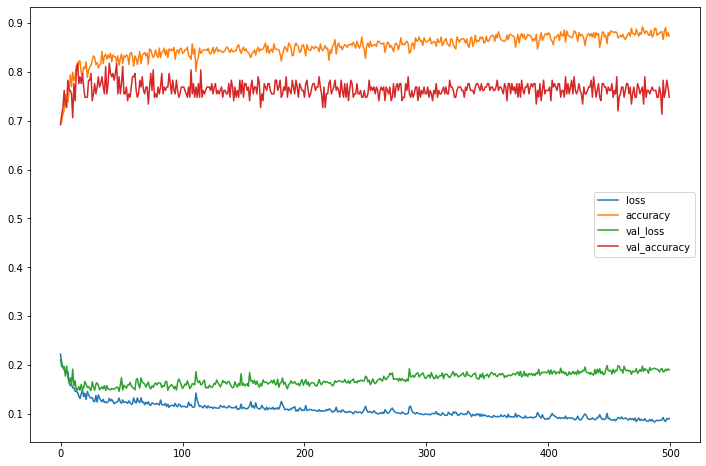

In [26]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # Train 손실률
plt.plot(hist.history['accuracy']) #Train 정확도
plt.plot(hist.history['val_loss']) #Validation 손실률
plt.plot(hist.history['val_accuracy']) #Validation 정확도
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()

In [27]:
#모형평가
scores=model.evaluate(X_train,y_train,verbose=1) #학습용
print(scores) #에러율, 정확도
scores=model.evaluate(X_test, y_test, verbose=1) #검증용
print(scores)

712/712 [==============================] - 0s 17us/step
[0.1023181149463975, 0.8651685118675232]
179/179 [==============================] - 0s 28us/step
[0.16713052555169472, 0.7709497213363647]


In [28]:
pred=model.predict(X_test)
print(X_test[:3])
print(y_test[:3]) #실제값
print(pred[:3]) #예측값

     Pclass1  Pclass2  Pclass3  male  female   Age  SibSp  Parch     Fare
24         0        0        1     0       1   8.0      3      1  21.0750
251        0        0        1     0       1  29.0      1      1  10.4625
694        1        0        0     1       0  60.0      0      0  26.5500
24     0
251    0
694    0
Name: Survived, dtype: int64
[[0.00497664]
 [0.04882509]
 [0.12700576]]


In [29]:
X_train.columns

Index(['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

In [30]:
#새로운 값으로 확인
import numpy as np
#1등석,여성,19세,부모/부부2,형제자매2,요금50
person1=np.array([1,0,0,0,1,19,2,2,50]).reshape(1,9)
#2등석,남성, 17세,부모/부부0,형제자매1, 요금30
person2=np.array([0,1,0,1,0,17,0,1,30]).reshape(1,9)
#3등석 여성, 40세 부모/부부1, 형제자매0, 요금70
person3=np.array([0,0,1,0,1,40,1,0,70]).reshape(1,9)
print(model.predict(person1)) #생존률 99.9%
print(model.predict(person2)) #생존률 2.2%
print(model.predict(person3)) #생존률 99.3%

[[0.99596596]]
[[0.00030039]]
[[0.6075502]]


In [31]:
model.save('d:/data/titanic/titanic_keras.model')
model.save_weights('d:/data/titanic/titanic.weights')